In [21]:
import wandb 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
entity = 'l65'

In [2]:
wandb.init(entity=entity)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: evangeorgerex (l65). Use `wandb login --relogin` to force relogin


In [8]:
# Assuming you have an API key set up, either through the environment variable or login
api = wandb.Api()

# Specify the projects to search
projects = [
    # 'Mamba_pe1b_Experiments_round_1', 
    'Multi_pe1u_Experiments_round_1',
    'Mamba_Baseline_Experiments_round_1',
    'graphssm_experiments_round_1',
    ]

PASCAL_VOC = 'edge_wt_region_boundary'
PEPTIDES_FUNC = 'peptides-functional'
PEPTIDES_STRUCT = 'peptides-structural'

dataset = PEPTIDES_FUNC

filtered_runs = []

for project in projects:
    runs = api.runs(f"{entity}/{project}")
    for run in runs:
        if 'dataset' in run.config and 'name' in run.config['dataset']:
            if run.config['dataset']['name'] == dataset:
                filtered_runs.append(run)

# Now `filtered_runs` contains all runs across specified projects tagged with 'dataset_x'
# You can iterate over `filtered_runs` to compare them or further analyze the data
for run in filtered_runs:
    print(f"Run ID: {run.id}, Project: {run.project}, Metrics: {run.summary}")


Run ID: f2q9cg84, Project: Multi_pe1u_Experiments_round_1, Metrics: {'best/epoch': 99, 'val/params': 373018, 'best/val_loss': 0.48419573, 'best_test_perf': 0.62469, 'train/accuracy': 0.16463, 'val/ap': 0.62174, '_runtime': 2631.7191219329834, 'test/auc': 0.87616, 'train/loss': 0.0027174, 'test/accuracy': 0.16465, 'best/test_loss': 0.5253741, 'train/time_iter': 0.13456, 'train/time_epoch': 11.43744, 'train/ap': 0.99934, 'train/params': 373018, 'val/accuracy': 0.16482, 'best/train_ap': 0.99558, 'test/time_iter': 0.04159, 'test/time_epoch': 0.79016, 'train/eta_hours': 0, 'full_epoch_time_sum': 2629.105366755277, 'train/eta': 0, '_timestamp': 1710248179.521138, 'best_train_perf': 0.99558, 'val/loss': 0.55110344, '_step': 199, '_wandb': {'runtime': 2631}, 'test/lr': 0, 'val/auc': 0.8737, 'val/epoch': 199, 'train/epoch': 199, 'best_val_perf': 0.63101, 'best/train_loss': 0.01156345, 'val/lr': 0, 'test/ap': 0.62369, 'test/loss': 0.60223569, 'train/auc': 0.99998, 'test/epoch': 199, 'test/params

In [22]:
# Container for aggregated run data
run_data = []

for run in filtered_runs:
    # Fetch history for each run; adjust `keys` based on what you need (e.g., "val/f1")
    history = run.history()
    history['approach'] = run.project
    history['dataset'] = dataset
    history['step'] = history.index
    run_data.append(history)
    
df = pd.concat(run_data)


In [24]:
df.columns

Index(['best/test_loss', 'train/time_iter', 'val/time_epoch', 'val/lr',
       'train/ap', 'val/params', 'train/lr', '_timestamp', 'train/auc',
       'val/time_iter', 'train/eta_hours', 'train/time_epoch', 'best/test_ap',
       'val/ap', 'test/epoch', '_step', 'train/eta', 'train/params',
       'best/val_ap', 'best/val_loss', 'test/time_iter', 'val/epoch',
       'train/accuracy', 'test/time_epoch', 'train/epoch', 'best/train_ap',
       'val/auc', 'test/ap', 'val/loss', 'best/epoch', 'test/accuracy',
       'test/auc', 'test/loss', 'test/lr', 'train/loss', '_runtime',
       'val/accuracy', 'test/params', 'best/train_loss', 'approach', 'dataset',
       'step'],
      dtype='object')

/home/er647/.conda/envs/L65/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/er647/.conda/envs/L65/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/er647/.conda/envs/L65/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


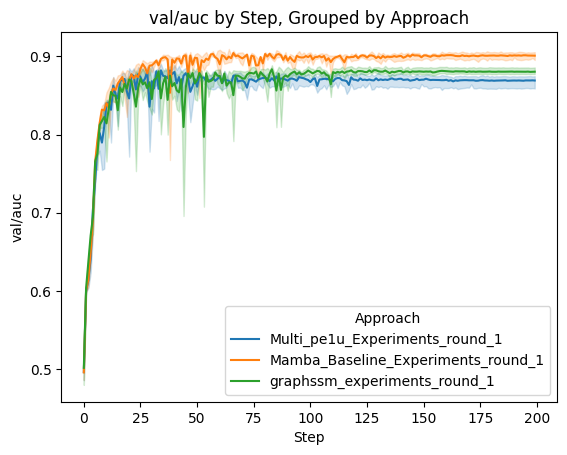

In [26]:
# Assuming 'df' is your pandas DataFrame
y_axis_key = 'val/auc'

sns.lineplot(data=df, x='step', y=y_axis_key, hue='approach')

plt.xlabel('Step')
plt.ylabel(y_axis_key)
plt.title(f'{y_axis_key} by Step, Grouped by Approach')
plt.legend(title='Approach')
plt.show()

In [14]:
run=filtered_runs[0]

In [17]:
run.history()

,best/test_loss,train/time_iter,val/time_epoch,val/lr,train/ap,val/params,train/lr,_timestamp,train/auc,val/time_iter,...,best/epoch,test/accuracy,test/auc,test/loss,test/lr,train/loss,_runtime,val/accuracy,test/params,best/train_loss
0,0.722800,0.14989,0.97086,0,0.16730,373018,0.000000e+00,1.710246e+09,0.49175,0.05110,...,0,0.16465,0.48690,0.722800,0,0.720647,17.072198,0.16482,373018,0.720647
1,0.540007,0.13544,0.78510,0,0.24771,373018,1.000000e-04,1.710246e+09,0.59184,0.04132,...,1,0.16465,0.60293,0.540007,0,0.638027,30.245342,0.16482,373018,0.638027
2,0.540007,0.13539,0.78535,0,0.25578,373018,2.000000e-04,1.710246e+09,0.61199,0.04133,...,1,0.16465,0.61213,0.625633,0,0.589905,43.414253,0.16482,373018,0.638027
3,0.576709,0.13703,0.78508,0,0.27849,373018,3.000000e-04,1.710246e+09,0.64528,0.04132,...,3,0.16465,0.65087,0.576709,0,0.557611,56.721765,0.16482,373018,0.557611
4,0.377779,0.13527,0.78547,0,0.30817,373018,4.000000e-04,1.710246e+09,0.67691,0.04134,...,4,0.16465,0.71155,0.377779,0,0.488782,69.880364,0.16482,373018,0.488782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.525374,0.13442,0.78157,0,0.99913,373018,1.710000e-06,1.710248e+09,0.99997,0.04114,...,99,0.16465,0.87609,0.601906,0,0.002875,2579.013803,0.16482,373018,0.011563
196,0.525374,0.13704,0.78118,0,0.99923,373018,1.090000e-06,1.710248e+09,0.99998,0.04111,...,99,0.16465,0.87576,0.609055,0,0.002780,2592.313499,0.16482,373018,0.011563
197,0.525374,0.13500,0.78115,0,0.99919,373018,6.200000e-07,1.710248e+09,0.99998,0.04111,...,99,0.16465,0.87580,0.606497,0,0.002735,2605.438787,0.16482,373018,0.011563
198,0.525374,0.13490,0.78037,0,0.99933,373018,2.700000e-07,1.710248e+09,0.99998,0.04107,...,99,0.16465,0.87636,0.605978,0,0.002671,2618.555085,0.16482,373018,0.011563


In [11]:
run_data[0]

('peptides-functional.GPS.CustomGatedGCN+MultiMambaL65_10.r2',
 Empty DataFrame
 Columns: []
 Index: [])